In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/Users/Ziqi/Desktop/mgwr-master/')

from mgwr.gwr import GWR,MGWR                                                   
from mgwr.sel_bw import Sel_BW       

/Users/ziqi/opt/anaconda3/lib/python3.7/site-packages/libpysal/examples/remotes.py:26: UserWarning: Remote data sets not available. Check connection.
  warnings.warn("Remote data sets not available. Check connection.")


In [2]:
import pandas as pd
from mgwr.gwr import GWR,MGWR                                                   
from mgwr.sel_bw import Sel_BW       

In [3]:
data = pd.read_csv("us_election_2016.csv")

In [4]:
data

,county_id,county_name,proj_X,proj_Y,pct_dem,sex_ratio,pct_black,pct_hisp,pct_bach,income,pct_65_over,pct_age_18_29,gini,pct_manuf,log_pop_den,pct_3rd_party,turn_out,pct_foreign,pct_insured
0,1001,"Autauga County, Alabama",8.371379e+05,-8.337462e+05,24.622532,95.4,18.370906,2.572254,24.6,53099,18.716578,17.797326,0.4295,15.493720,4.513802,3.463741,60.648447,1.838362,91.078750
1,1003,"Baldwin County, Alabama",7.590934e+05,-1.051545e+06,20.207793,95.3,9.225603,4.366698,29.5,51365,24.035990,15.497172,0.4608,11.073587,4.775751,4.068687,61.342448,3.269510,88.198187
2,1005,"Barbour County, Alabama",9.572822e+05,-8.987653e+05,47.176755,115.1,47.888329,4.309762,12.9,33956,21.019108,18.774522,0.4620,27.297836,3.375772,1.375490,50.110114,2.859397,86.998564
3,1007,"Bibb County, Alabama",7.888664e+05,-7.842644e+05,21.760334,115.2,21.212121,2.223994,12.0,39776,18.884664,18.760330,0.4494,25.548934,3.589295,2.347205,49.519049,1.351232,90.974852
4,1009,"Blount County, Alabama",8.271604e+05,-6.655204e+05,8.618829,98.1,1.557951,8.727298,13.0,46212,22.513089,16.071204,0.4165,17.542699,4.485875,2.239331,58.041291,4.271801,88.842896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,56037,"Sweetwater County, Wyoming",-1.005587e+06,2.643419e+05,21.000975,109.1,0.865840,15.859591,21.4,68233,12.965517,20.051724,0.3929,7.937298,1.451365,10.186807,52.726025,5.509685,86.838382
2808,56039,"Teton County, Wyoming",-1.096836e+06,5.490994e+05,65.100134,107.9,0.614419,15.174822,53.8,75594,14.658385,17.480745,0.4861,2.019558,1.679772,11.023996,69.335253,11.475048,85.321873
2809,56041,"Uinta County, Wyoming",-1.141496e+06,2.397443e+05,16.340402,102.7,0.186665,8.959939,18.3,53323,15.198864,16.963636,0.4412,5.175659,2.302408,13.152302,57.585076,3.986981,84.317798
2810,56043,"Washakie County, Wyoming",-8.799075e+05,5.155334e+05,15.451641,94.7,0.790325,13.962400,21.1,46212,26.196809,11.747872,0.4333,10.190587,1.314366,9.727320,60.732948,3.783978,83.123549


In [11]:
#Specify location variable
coords = list(zip(data[["proj_X"]].values, data[["proj_Y"]].values))

#Specify dependent variable
y = data[["pct_dem"]].values

#Specify covariates
X_names = ['sex_ratio','pct_black', 'pct_hisp', 'pct_bach', 'income', 
           'pct_65_over','pct_age_18_29', 'gini', 'pct_manuf', 'log_pop_den', 
           'pct_3rd_party','turn_out', 'pct_foreign', 'pct_insured']
X = data[X_names].values

In [12]:
#Data Standardization
y = (y - y.mean())/y.std()
X = (X - X.mean(axis=0))/X.std(axis=0)

In [13]:
gwr_selector = Sel_BW(coords, y, X, kernel="bisquare", fixed=False)
gwr_opt_bw = gwr_selector.search(search_method="golden_section", 
                  criterion="AICc")
print("GWR Optimal Bandwidth Found:", gwr_opt_bw)

GWR Optimal Bandwidth Found: 156.0


In [8]:
gwr_rslt = GWR(coords, y ,X, bw=gwr_opt_bw, kernel="bisquare", fixed=False).fit()

In [14]:
%%time
mgwr_selector = Sel_BW(coords, y, X, kernel="bisquare", fixed=False, 
                       multi=True)
opt_bws = mgwr_selector.search(search_method="golden_section", 
                criterion="AICc")
print("MGWR Optimal Bandwidths Found:", opt_bws)

MGWR Optimal Bandwidths Found: [  43.  603.   43.  543.  208. 2659.  656.   58.  763. 2809.  387.  160.
  117. 1424.   43.]
CPU times: user 8h 11min 13s, sys: 3min 52s, total: 8h 15min 6s
Wall time: 12h 33min 52s


In [16]:
mgwr_rslt = MGWR(coords, y ,X, selector=mgwr_selector, kernel="bisquare", 
                  fixed=False).fit()


In [54]:
mgwr_rslt.summary()

Model type                                                         Gaussian
Number of observations:                                                2812
Number of covariates:                                                    15

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            966.230
Log-likelihood:                                                   -2488.097
AIC:                                                               5006.194
AICc:                                                              5008.389
BIC:                                                             -21246.568
R2:                                                                   0.656
Adj. R2:                                                              0.655

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [42]:
import geopandas as gpd

#Read a shapefile and apply a map projection
shp = gpd.read_file("/Users/ziqi/Desktop/MGWR book/MGWR Software/Data/county_shp.shp")
shp = shp.to_crs('ESRI:102008')
#Dissolve counties to obtain state boundary
state = shp.dissolve(by='STATEFP').geometry.boundary

#Join shapefile to the original data
data = gpd.GeoDataFrame(data.merge(shp[['geoid_int','geometry']],left_on='county_id',right_on='geoid_int'))

In [86]:
import matplotlib as mpl
from mgwr.utils import shift_colormap,truncate_colormap
from matplotlib import cm,colors

def plot_local_est(j):
    
    #Specify legend range and color
    vmin = -1
    vmax = 1
        
    cmap = cm.get_cmap("bwr_r")
    
    cmap = shift_colormap(cmap, start=0.0, 
                          midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

    #Plot local parameter estimates
    ax = data.plot(column=mgwr_rslt.params[:,j],vmin=vmin, vmax=vmax,
                   figsize=(10,10),cmap=cmap,linewidth=0.1, 
                   edgecolor='white')
    
    #Filter out any insignificant estimates
    mgwr_filtered_t = mgwr_rslt.filter_tvals(alpha=0.05)
    if (mgwr_filtered_t[:,j] == 0).any():
        data[mgwr_filtered_t[:,j] == 0].plot(color='lightgrey', ax=ax,
                                             linewidth=0.1,edgecolor='white')
    
    #Overlay state boundary
    state.plot(color=None,ax=ax,linewidth=0.5,edgecolor='black')
    
    plt.axis('off')
    
    #Add the legend
    fig = ax.get_figure()
    cax = fig.add_axes([0.99, 0.2, 0.025, 0.6])
    sm = plt.cm.ScalarMappable(cmap=cmap,
                               norm=colors.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    fig.colorbar(sm, cax=cax)
    
    #Save to an image
    plt.savefig('map_export.png',dpi=400,bbox_inches='tight')

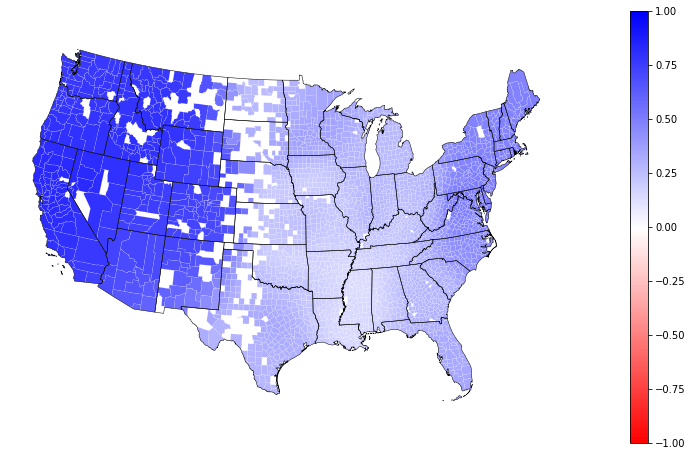

In [88]:
plot_local_est(4)